In [576]:
import torch
what_were_covering={
    1: "data(prepare and load)",
    2: "build model",
    3: "fitting the model into the data(training)",
    4: "making prediction and evaluating the model",
    5: "saving and loading a model",
    6: "putting it altogether"
}
what_were_covering

{1: 'data(prepare and load)',
 2: 'build model',
 3: 'fitting the model into the data(training)',
 4: 'making prediction and evaluating the model',
 5: 'saving and loading a model',
 6: 'putting it altogether'}

In [550]:
from torch import nn
import matplotlib.pyplot as plt
torch.__version__

'2.6.0+cu124'

Data Preparing and loading
linear regression formula to make straight line with known *parameters*

In [577]:
#known parameters
weight=0.7
bias=0.3

#create
start=0
end=1
step=0.02
#usually capital case matrix/tensor, lowercase vector
#here capotal case vector
X=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*X+bias

X[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [578]:
len(X),len(y)

(50, 50)

###splitting data into training and test sets

In [579]:
train_split=int(0.8*len(X))
train_split

40

In [580]:
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test=X[train_split:],y[train_split:]
len(X_train),len(y_train),len(X_test),len(y_test)

(40, 40, 10, 10)

In [581]:
X_train,y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [582]:
torch.randn(1)

tensor([0.2345])

###better data visualization

In [583]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  """
  plots training data,test data and compares pedictions
  """
  plt.figure(figsize=(10,7))
  #plot training data in blue
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  #test data in green
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions")

  plt.legend(prop={"size":14});

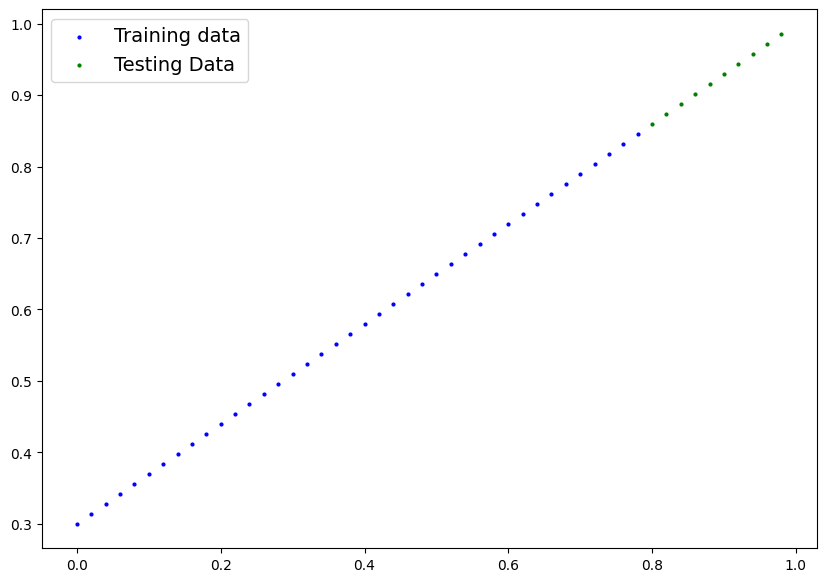

In [558]:
plot_predictions();

In [584]:
torch.manual_seed(42)
torch.randn(1)

tensor([0.3367])

FIrst pytorch model

In [585]:
from torch import nn
#create linear reression model
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights=nn.Parameter(torch.randn(1,
                                          dtype=torch.float,
                              requires_grad=True))

    self.bias=nn.Parameter(torch.randn(1,
                                        dtype=torch.float,
                          requires_grad=True))
  def forward(self,x:torch.tensor)->torch.tensor: # <- x is the inpput data
    return self.weights * x +self.bias #linear regression eqn

In [586]:
torch.manual_seed(42)
model_0=LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [587]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [588]:
weight,bias


(0.7, 0.3)

In [589]:
###making prediction using 'torch.inference' mode
with torch.inference_mode():
  y_preds=model_0(X_test)
# with torch.no_grad():
#   y_preds=model_0(X_test)
y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

In [590]:
# y_preds=model_0(X_test)
# y_preds

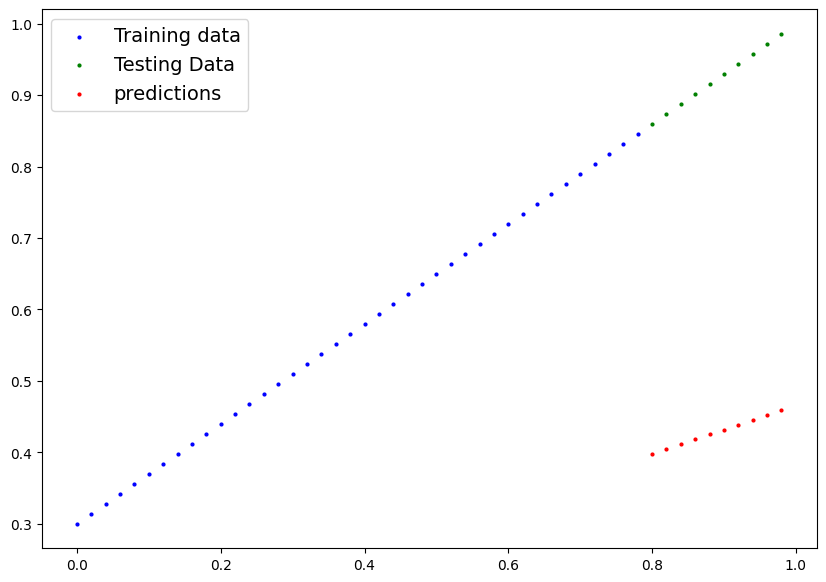

In [566]:
plot_predictions(predictions=y_preds)

In [591]:
model_0.parameters()

<generator object Module.parameters at 0x7c57cadc67a0>

In [592]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [593]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [594]:
#setup a loss function
loss_fn=nn.L1Loss()

#setup optimizer
optimizer=torch.optim.SGD(params=model_0.parameters(),
                          lr=0.01)

In [595]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [596]:

with torch.no_grad():
  list(model_0.parameters())

In [597]:
list(model_0.eval().parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [598]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [604]:
#Training loop and Testing Loop
epochs=200

epoch_count=[]
loss_values=[]
test_loss_values=[]
#Training loop

for epoch in range(epochs):
  #set model to training mode
  model_0.train()
  #1. Forward pass
  y_pred=model_0(X_train)
  #2.Calculate the loss
  loss=loss_fn(y_pred,y_train)
  # print(f'Loss: {loss}')
  #3.optimizer zero grad
  optimizer.zero_grad()
  #4. perform back propagation on the loss with respect to the parameters of the model
  loss.backward()
  #5.Step the optimizer(perform gradient descent)
  optimizer.step()
  #Testing
  model_0.eval()
  with torch.inference_mode():#with torch.no_grad()
    #1.do the forward pass
    test_pred=model_0(X_test)
    #2.calculate the loss
    test_loss=loss_fn(test_pred,y_test)
  if epoch %10==0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch}| Loss: {loss} | Test Loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0| Loss: 0.3013603389263153 | Test Loss: 0.4675942063331604
OrderedDict([('weights', tensor([0.3445])), ('bias', tensor([0.1488]))])
Epoch: 10| Loss: 0.18615034222602844 | Test Loss: 0.3328842222690582
OrderedDict([('weights', tensor([0.3835])), ('bias', tensor([0.2488]))])
Epoch: 20| Loss: 0.08227583020925522 | Test Loss: 0.2069590985774994
OrderedDict([('weights', tensor([0.4222])), ('bias', tensor([0.3403]))])
Epoch: 30| Loss: 0.05181945487856865 | Test Loss: 0.14023718237876892
OrderedDict([('weights', tensor([0.4539])), ('bias', tensor([0.3788]))])
Epoch: 40| Loss: 0.04503796249628067 | Test Loss: 0.11182951927185059
OrderedDict([('weights', tensor([0.4768])), ('bias', tensor([0.3868]))])
Epoch: 50| Loss: 0.04132963344454765 | Test Loss: 0.09809747338294983
OrderedDict([('weights', tensor([0.4956])), ('bias', tensor([0.3838]))])
Epoch: 60| Loss: 0.03785243630409241 | Test Loss: 0.08776430785655975
OrderedDict([('weights', tensor([0.5134])), ('bias', tensor([0.3783]))])
Epoc

In [605]:
import numpy as np
np.array(torch.tensor(loss_values).numpy()),test_loss_values

(array([0.30136034, 0.18615034, 0.08227583, 0.05181945, 0.04503796,
        0.04132963, 0.03785244, 0.03441364, 0.03097964, 0.02754883,
        0.02411001, 0.02067771, 0.0172452 , 0.0138064 , 0.01037578,
        0.00694158, 0.00350277, 0.00258851, 0.00258851, 0.00258851],
       dtype=float32),
 [tensor(0.4676),
  tensor(0.3329),
  tensor(0.2070),
  tensor(0.1402),
  tensor(0.1118),
  tensor(0.0981),
  tensor(0.0878),
  tensor(0.0795),
  tensor(0.0719),
  tensor(0.0636),
  tensor(0.0554),
  tensor(0.0478),
  tensor(0.0395),
  tensor(0.0312),
  tensor(0.0236),
  tensor(0.0154),
  tensor(0.0071),
  tensor(0.0084),
  tensor(0.0084),
  tensor(0.0084)])

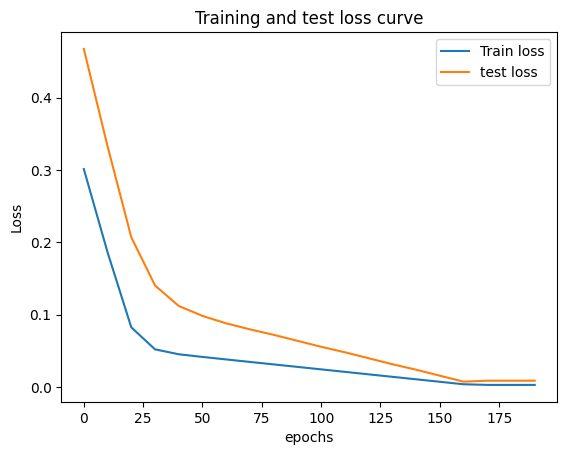

In [607]:
plt.plot(epoch_count,np.array(torch.tensor(loss_values)),label="Train loss")
plt.plot(epoch_count,test_loss_values,label="test loss")
plt.title("Training and test loss curve")
plt.ylabel("Loss")
plt.xlabel("epochs")
plt.legend()

In [602]:
with torch.inference_mode():
  list(model_0.parameters())

In [608]:
X_test,y_test

(tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800],
         [0.9000],
         [0.9200],
         [0.9400],
         [0.9600],
         [0.9800]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [609]:
list(model_0.state_dict())

['weights', 'bias']

In [610]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [611]:
with torch.inference_mode():
  y_preds_new=model_0(X_test)

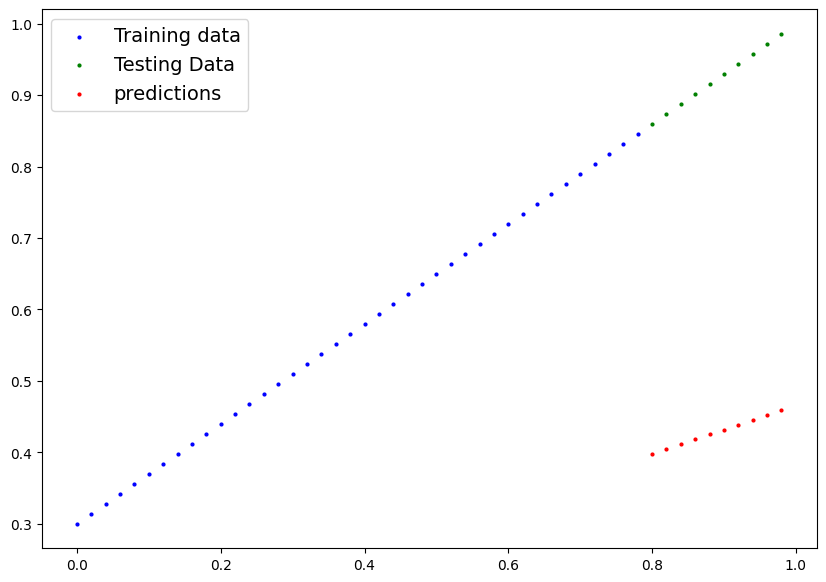

In [612]:
plot_predictions(predictions=y_preds)

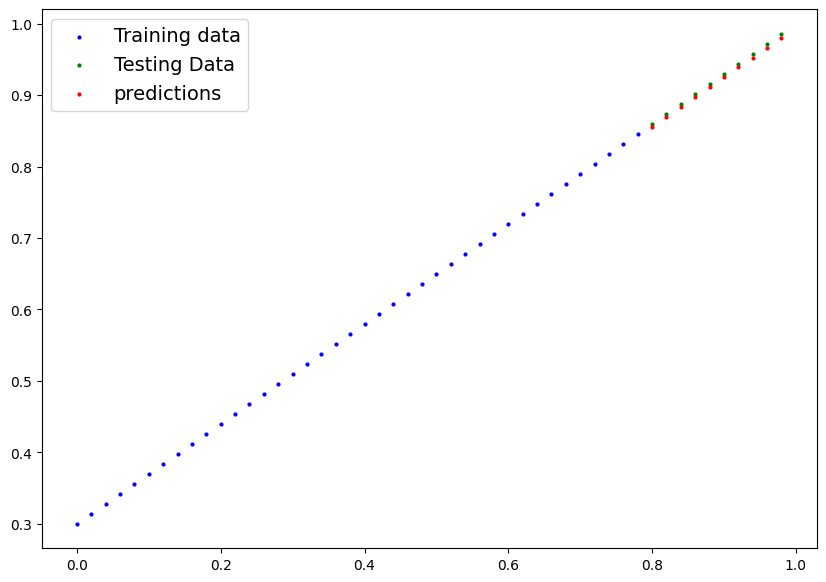

In [613]:
plot_predictions(predictions=y_preds_new)

In [614]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.6951])), ('bias', tensor([0.2993]))])